# Análisis DataSet IRIS

In [1]:
import numpy as np #Necesaria para el manejo de vectores y matrices 
import pandas as pd #Necesaria para el manejo de datasets
from sklearn.decomposition import PCA
from sklearn.decomposition import FactorAnalysis
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.cluster import KMeans
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#%% Importación del DataSet
data=pd.read_csv("C:/Users/Pedro/Documents/TFG/Python/Datasets/iris_flowers.csv")

#Veamos un informe del dataset 
data.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [3]:
codigos = {'iris_setosa': 0, 'iris_virginica': 1, 'iris_versicolor': 2}
data['class_as_numbers'] = data['class'].map(codigos)
data

,sepal_length,sepal_width,petal_length,petal_width,class,class_as_numbers
0,5.1,3.5,1.4,0.2,iris_setosa,0
1,4.9,3.0,1.4,0.2,iris_setosa,0
2,4.7,3.2,1.3,0.2,iris_setosa,0
3,4.6,3.1,1.5,0.2,iris_setosa,0
4,5.0,3.6,1.4,0.2,iris_setosa,0
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,iris_virginica,1
146,6.3,2.5,5.0,1.9,iris_virginica,1
147,6.5,3.0,5.2,2.0,iris_virginica,1
148,6.2,3.4,5.4,2.3,iris_virginica,1


C:\Users\Pedro\AppData\Local\Temp\ipykernel_28232\4222443017.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), vmin=-1, vmax=1, annot=True, cmap="Blues")


<Axes: >

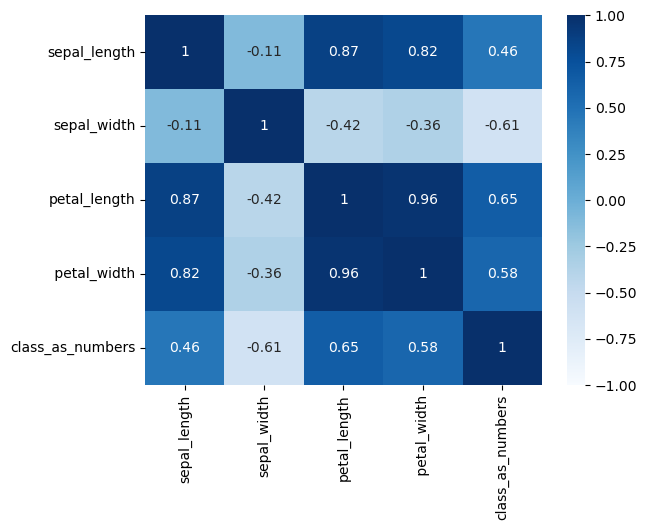

In [4]:
# Representación con un heatmap, pero lo vemos con las correlaciones para que esté todo en la misma escala 
sns.heatmap(data.corr(), vmin=-1, vmax=1, annot=True, cmap="Blues")

Como se puede ver hay una gran correlacioón entre las variables del pétalo y las del sépalo, por tanto, en un análisis factorial sería sencillo crear por lo menos dos factores comunes. Pero eso no daría 

In [5]:
X=data.iloc[:,0:4].values
n_factors=1
fa=FactorAnalysis(n_components=n_factors)
X_fa=fa.fit_transform(X)

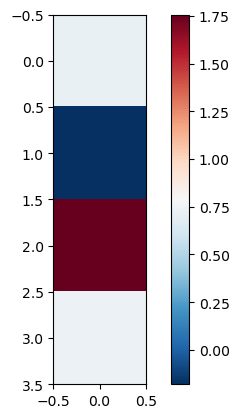

In [6]:
components = fa.components_.T
plt.imshow(components, cmap='RdBu_r')
plt.colorbar()
plt.show()

In [7]:
m=fa.components_
n=fa.noise_variance_
n

array([0.16350346, 0.15436415, 0.00938691, 0.04101233])

In [8]:
m1=m**2
m2 = np.sum(m1,axis=1)
pvar=[]
for i in range(n_factors):
    pvar.append((100*m2[i])/(np.sum(m2)))

print(pvar)

[100.0]


In [9]:
pvar_with_noise=[]
for i in range(n_factors):
    pvar_with_noise.append((100*m2[i])/(np.sum(m2)+np.sum(n)))
print(pvar_with_noise)

[91.8864830548711]


Por tanto, un solo factor puede explicar más de un 91% de la varianza, una combinación lineal de las 4 variables pueden explicar casi toda la variación del conjunto de datos. 
Este factor le podríamos llamar factor tamaño


In [10]:
FactorDf = pd.DataFrame(data = X_fa, columns = ['Factor común 1'])

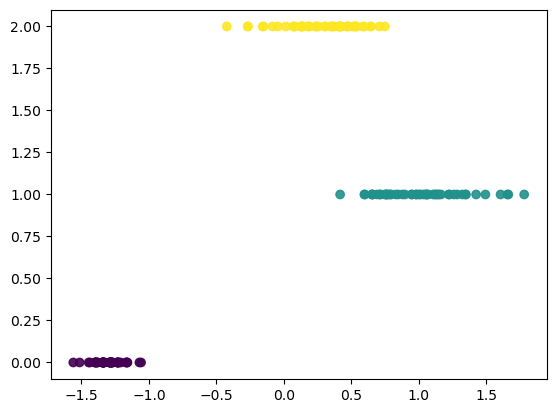

In [11]:
plt.scatter(FactorDf['Factor común 1'].values, data['class_as_numbers'].values, c=data['class_as_numbers'].values,alpha=0.9)

Ahora vamos a realizar un análisis discriminante, es decir, vamos a realizar un modelo predictivo para poder clasificar nuevas observaciones. Para empezar se preparan los datos separándolo en variables de respuesta y variables predictoras, tras esto tomaremos una parte de las observaciones para el entrenamiento y otra para la validación y comprobar que capacidad de generalización posee el modelo entrenado. 

In [12]:
X=data.iloc[:,0:4].values
y=data['class_as_numbers'].values

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)

Creamos una instancia de la clase LinearDiscriminantAnalysis y ajustamos con los datos de entrenamiento 

In [14]:
lda=LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)

LinearDiscriminantAnalysis()

Con el modelo ya ajustado en la celda anterior, ahora nos disponemos a comprobar la precisión del mismo utilizando el conjunto de datos de test para hacer una predicción y luego compararlos con sus valores reales.

In [15]:
y_pred = lda.predict(X_test)
accuracy = accuracy_score(y_test, y_pred, normalize=False)
print('Precisión del modelo:', accuracy)

Precisión del modelo: 45


In [16]:
y_test.shape

(45,)

Por tanto, el modelo ha conseguido generalizar de manera perfecta a los datos que no estaban en el entrenamiento. Habría que analizar si utilizando más muestras que no estuvieran en el conjunto de entrenamiento las clasificaría de la misma manera. 

In [17]:
X=X_fa
y=data['class_as_numbers'].values

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)

In [19]:
lda=LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)

LinearDiscriminantAnalysis()

In [20]:
y_pred = lda.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print('Precisión del modelo:', accuracy)

Precisión del modelo: 0.9555555555555556


En el caso de la transformación factorial se pierde cierta información pero dicha pérdida no es significativa en comparación con la reducción de la dimensionalidad